/tmp/ipython-input-1828508392.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipython-input-1828508392.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])
/tmp/ipython-input-1828508392.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_cols, palette='magma')


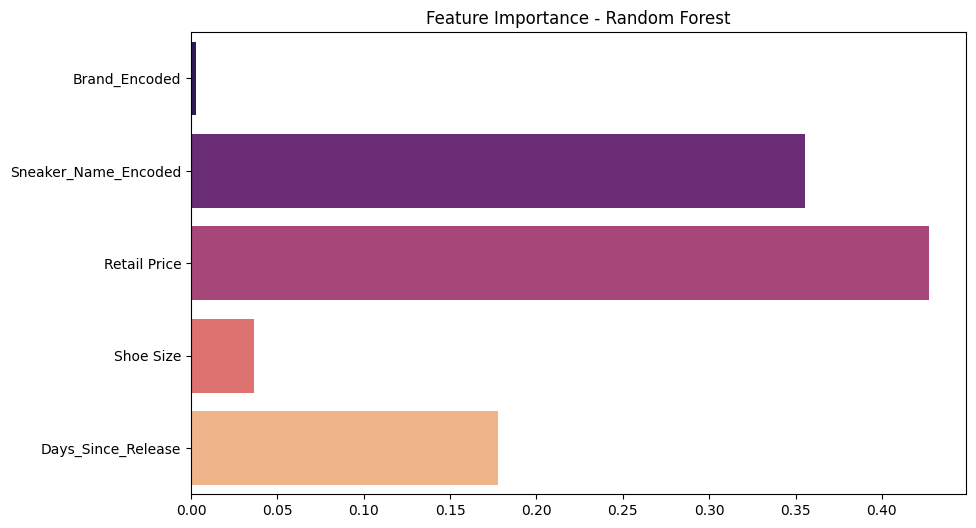

WYNIKI:
Random Forest MAE: 17.84
Gradient Boosting MAE: 44.86
Random Forest RMSE: 38.06
Gradient Boosting RMSE: 79.69
Random Forest R2 Score: 0.9819
Gradient Boosting R2 Score: 0.9208


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


filename = 'StockX-Data-Contest-2019-3.csv'
df = pd.read_csv(filename)


cols_to_clean = ['Sale Price', 'Retail Price']
for col in cols_to_clean:

    df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '')

    df[col] = pd.to_numeric(df[col], errors='coerce')


df.dropna(subset=['Sale Price', 'Retail Price', 'Release Date', 'Order Date'], inplace=True)


df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Release Date'] = pd.to_datetime(df['Release Date'])




df['Days_Since_Release'] = (df['Order Date'] - df['Release Date']).dt.days

df['Premium_Percent'] = (df['Sale Price'] - df['Retail Price']) / df['Retail Price']


le_brand = LabelEncoder()
df['Brand_Encoded'] = le_brand.fit_transform(df['Brand'])
le_model = LabelEncoder()
df['Sneaker_Name_Encoded'] = le_model.fit_transform(df['Sneaker Name'])

feature_cols = ['Brand_Encoded', 'Sneaker_Name_Encoded', 'Retail Price', 'Shoe Size', 'Days_Since_Release']
X = df[feature_cols]
y = df['Sale Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


importances = rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_cols, palette='magma')
plt.title('Feature Importance - Random Forest')
plt.show()


print("WYNIKI:")
print(f"Random Forest MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"Gradient Boosting MAE: {mean_absolute_error(y_test, y_pred_gb):.2f}")
print(f"Random Forest RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")
print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_gb)):.2f}")
print(f"Random Forest R2 Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Gradient Boosting R2 Score: {r2_score(y_test, y_pred_gb):.4f}")
